This script will attempt to process and plot echosounder and amplitude Data as a means of understanding sediment characteristics.

In [8]:
### Code to read in h5 files as detailed in the first guidebook
# Import necessary packages
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat

In [9]:
deployment_num = 1
sensor_id = "E1_103071"
#directory_initial_user_path = r"/Volumes/BOEM/"  # Katherine
# directory_initial_user_path = r"/Volumes/kanarde/BOEM/"  # Brooke
directory_initial_user_path = r"Z:/"  # Levi

In [10]:
# Create dictionary for each sensor
dirpath=os.path.join(directory_initial_user_path, f"deployment_{deployment_num}/Processed/",f"{sensor_id}",'Group04')  # path to the directory containing the h5 files
files = os.listdir(dirpath) # list of files for the sensor
Data = {}
for file in files:
    file_path = os.path.join(dirpath, file)  # file path
    df = pd.read_hdf(file_path)  # read the file into a Pandas Dataframe
    file_name = file.split('.')[0]  # file name 
    print(file_name)
    Data[file_name] = df  # store Dataframe
globals()[f"Data_{sensor_id}"] = Data

AbsVel
Time
EastVel
NorthVel
VertVel
ErrVel
Heading
Roll
Pitch
Pressure
VelBeamCorr1
VelBeamCorr2
VelBeamCorr3
VelBeamCorr4
CellDepth
Echo1
Echo2
CellDepth_echo
AmpBeam1
AmpBeam2
AmpBeam3
AmpBeam4
VbAmplitude


In [11]:
filepath = "Z:\deployment_1\BulkStats\E1_103071"
files = os.listdir(filepath) # list of files for the sensor
waves = {}
for file in files:
    file_path = os.path.join(filepath, file)  # file path
    df = pd.read_hdf(file_path)  # read the file into a Pandas Dataframe
    file_name = file.split('.')[0]  # file name 
    print(file_name)
    waves[file_name] = df  # store Dataframe
globals()[f"waves_{sensor_id}"] = waves

GroupSpeed
Frequencies
WaveNumbers
Time
WaveCelerity
MeanPeriod
SignificantWaveHeight
DepthAveragedEastVelocity
DepthAveragedNorthVelocity
DepthAveragedUpVelocity
DepthAveragedCurrentVelocity
MeanDirection1
MeanSpread1
MeanDirection2
MeanSpread2
DepthAveragedFlowDirection
PressureSpectra
PressureEastVelCospectra
PressureNorthVelCospectra
EastVelSpectra
NorthVelSpectra
VolumetricBackscatter1
VolumetricBackscatter2
Echo1avg
Echo2avg
SedTime
Vertavg


***This section will calculate integrated bin values and bin averages***

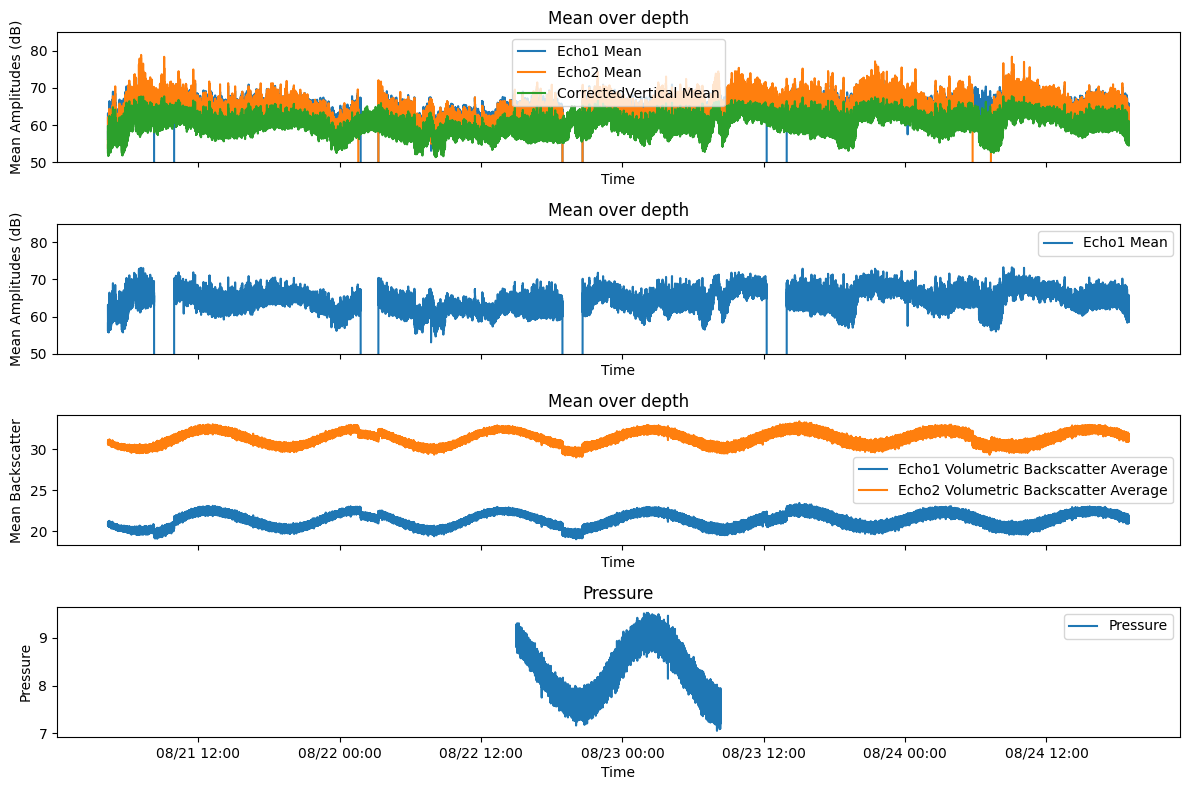

In [51]:
# Integrated and avg backscatter over depth bins (you have to avg the echosounder to same bin size as vertbeam first)


fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

axs[0].plot(waves['SedTime'],waves['Echo1avg'], label='Echo1 Mean')
axs[0].plot(waves['SedTime'],waves['Echo2avg'], label='Echo2 Mean')
axs[0].plot(waves['SedTime'],waves['Vertavg']-17, label='CorrectedVertical Mean')
axs[0].set_title('Mean over depth')
axs[0].set_ylabel('Mean Amplitudes (dB)')
axs[0].set_xlabel('Time')
axs[0].set_ylim(50,85)
axs[0].legend()

axs[1].plot(waves['SedTime'],waves['Echo1avg'], label='Echo1 Mean')
axs[1].set_title('Mean over depth')
axs[1].set_ylabel('Mean Amplitudes (dB)')
axs[1].set_xlabel('Time')
axs[1].set_ylim(50,85)
axs[1].legend()

axs[2].plot(waves['SedTime'],waves['VolumetricBackscatter1'], label='Echo1 Volumetric Backscatter Average')
axs[2].plot(waves['SedTime'],waves['VolumetricBackscatter2'], label='Echo2 Volumetric Backscatter Average')
axs[2].set_title('Mean over depth')
axs[2].set_ylabel('Mean Backscatter')
axs[2].set_xlabel('Time')
axs[2].legend()

axs[3].plot(Data['Time'],Data['Pressure'], label='Pressure')
axs[3].set_title('Pressure')
axs[3].set_ylabel('Pressure')
axs[3].set_xlabel('Time')
axs[3].legend()

for ax in axs:
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M"))
plt.tight_layout()
# plt.savefig(f"C:\\Users\\lwlav\\OneDrive\\Documents\\Summer 2024 CHAZ\\Figures\\{sensor_id}_backscatter_.png")

***This section will perform some analyses on Vertical Beam and Echosounder***

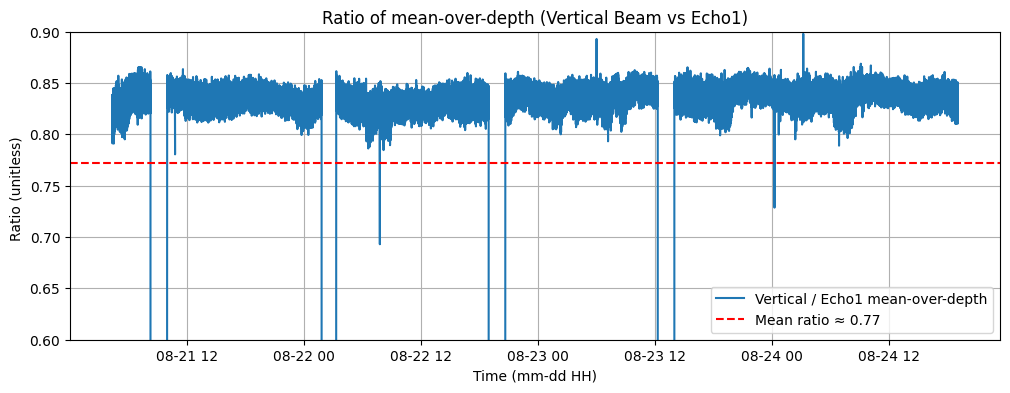

In [ ]:
from scipy.stats import linregress

ratio = waves['Echo1avg']/waves['Vertavg']
m,b,r2,pval,stderr = linregress(waves['Echo1avg'],waves['Vertavg'])

plt.figure(figsize=(12,4))
plt.plot(Data['Time'],ratio, label='Vertical / Echo1 mean-over-depth')
plt.axhline(ratio.mean(), color='red', linestyle='--', label=f'Mean ratio ≈ {ratio.mean():.2f}')
plt.xlabel('Time (mm-dd HH)')
plt.ylabel('Ratio (unitless) ')
plt.title('Ratio of mean-over-depth (Vertical Beam vs Echo1)')
plt.legend()
plt.grid()
# plt.savefig(f"C:\\Users\\lwlav\\OneDrive\\Documents\\Summer 2024 CHAZ\\Figures\\{sensor_id}_meanratios.png")


# plt.figure(figsize=(6,6))
# plt.scatter(echo1_avg, vertical_avg, alpha=0.5, label='Data')
# plt.plot(echo1_avg, m*echo1_avg + b, color='red', label='Fit')
# plt.xlabel('Echo1 mean over depth')
# plt.ylabel('Vertical beam mean over depth')
# plt.title('Least-squares fit')
# plt.legend()
# plt.grid()
# plt.savefig(f"C:\\Users\\lwlav\\OneDrive\\Documents\\Summer 2024 CHAZ\\Figures\\{sensor_id}_linregmeans.png")

print(b,m,r2)

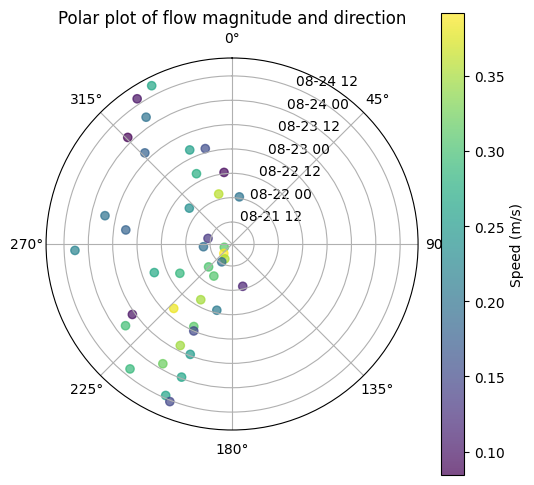

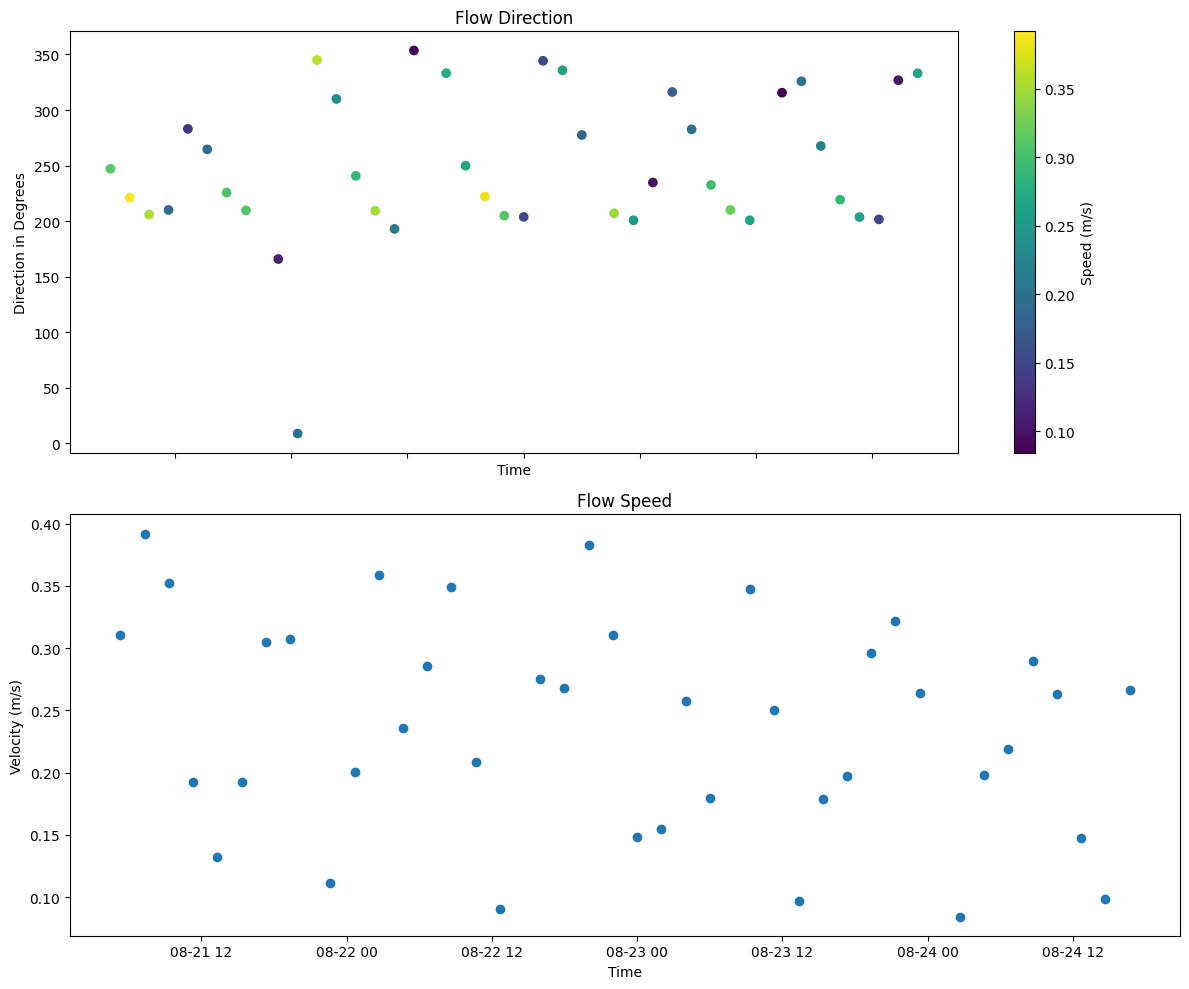

In [ ]:
#Orbital plot to look at flow direction


# Convert to radians
speed = waves['DepthAveragedCurrentVelocity']

dir_rad = np.deg2rad(waves['DepthAveragedFlowDirection'])

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(dir_rad, waves['Time'].values, c=speed, cmap='viridis', alpha=0.7)

ax.set_theta_zero_location('N')  # set 0° at north
ax.set_theta_direction(-1)       # clockwise
plt.title('Polar plot of flow magnitude and direction')
plt.colorbar(sc, label='Speed (m/s)')
# plt.savefig(f"C:\\Users\\lwlav\\OneDrive\\Documents\\Summer 2024 CHAZ\\Figures\\{sensor_id}_polarflowdir.png")

figs, axs = plt.subplots(2,1, figsize = (12,10),sharex=True)
gg= axs[0].scatter(waves['Time'].values,waves['DepthAveragedFlowDirection'], c = speed)
plt.colorbar(gg, label= 'Speed (m/s)')
axs[0].set_title("Flow Direction")
axs[0].set_ylabel("Direction in Degrees")
axs[0].set_xlabel("Time")

gg1 = axs[1].scatter(waves['Time'].values,waves['DepthAveragedCurrentVelocity'])
axs[1].set_ylabel("Velocity (m/s)")
axs[1].set_xlabel("Time")
axs[1].set_title("Flow Speed")
plt.tight_layout()
# plt.savefig(f"C:\\Users\\lwlav\\OneDrive\\Documents\\Summer 2024 CHAZ\\Figures\\{sensor_id}_flowdir.png")


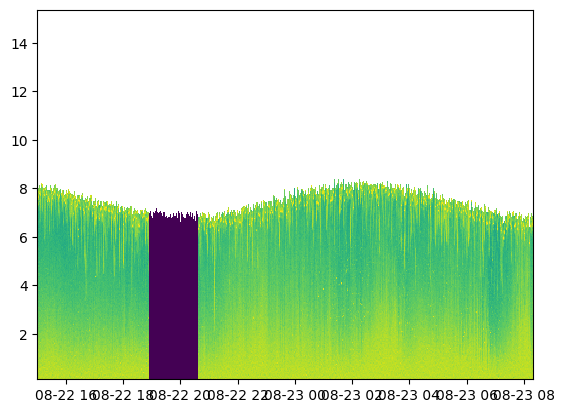

In [50]:
plt.pcolormesh(Data['Time'][0],Data['CellDepth_echo'],Data['Echo1'].T)
